In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Frist let's load the cleaned up dataset
url = "https://raw.githubusercontent.com/sanjanabansal1994/Early-Stage-Diabetes-Risk-Prediction/mehrdadmalekmo/modeling/data/processed.csv"
dataset = pd.read_csv(url)
dataset.head()

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group__34,age_group_35_49,age_group_50_64,age_group_65_
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0


In [3]:
# Define X (features) and Y (target)
X = dataset.drop('class', axis=1)
y = dataset['class']

In [4]:
# Split the data into training and tesing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=63)

In [5]:
# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9615384615384616
Confusion Matrix:
 [[40  1]
 [ 3 60]]


In [6]:
# What about other metrics?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.98      0.95      0.97        63

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



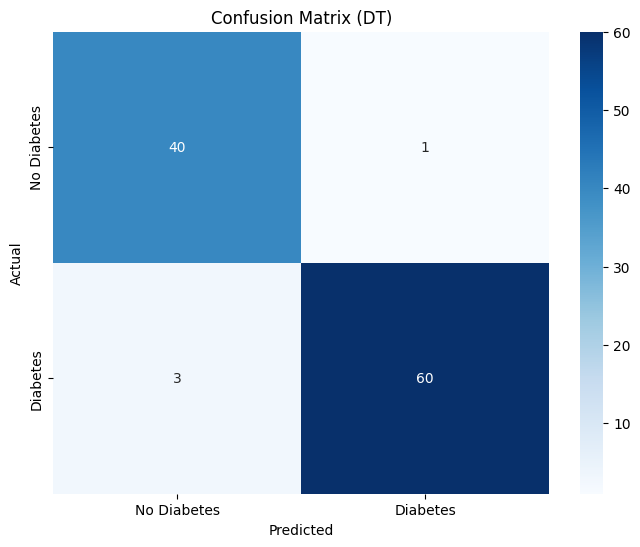

In [7]:
# PLot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (DT)')
plt.show()